# project on Customer Retention

In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#lets load the dataset
data = pd.read_excel("customer_retention_dataset.xlsx")
data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [3]:
#check the shape of data
data.shape

(269, 71)

In [4]:
#check for Null values
data.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [5]:
#lets check the data type of columns
data.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [6]:
#lets have a look on columns 
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [7]:
#check the entries from each column
for col in data.columns:
        print(data[col].value_counts())
        print()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560

In [8]:
#As pin code represent address, we will convert it into object data type
data['4 What is the Pin Code of where you shop online from?'] = data['4 What is the Pin Code of where you shop online from?'].astype("object")

In [9]:
# In column How do you access the internet while shopping on-line I observed two categories, Mobile internet and Mobile Internet
#lets combine these two
data['7 How do you access the internet while shopping on-line?'].replace('Mobile Internet','Mobile internet', inplace = True)

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


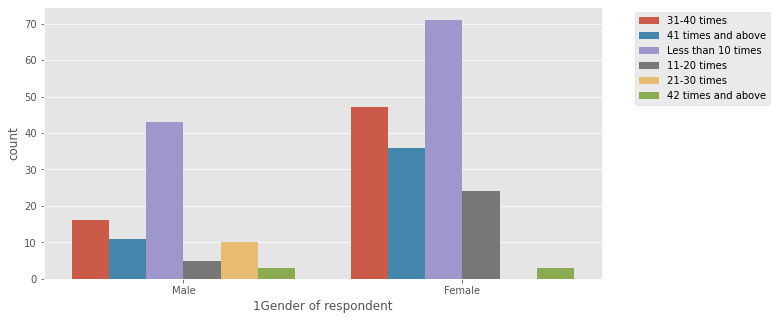

In [10]:
#lets have a look on gender of customer
plt.figure(figsize = (10,5))
plt.style.use('ggplot')
sns.countplot(data['1Gender of respondent'], hue = data['6 How many times you have made an online purchase in the past 1 year?'])
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
print(data['1Gender of respondent'].value_counts())
plt.show()

here in dataset we can say number of female customers are more than male customers. And also we can say female purchase more times than males.

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


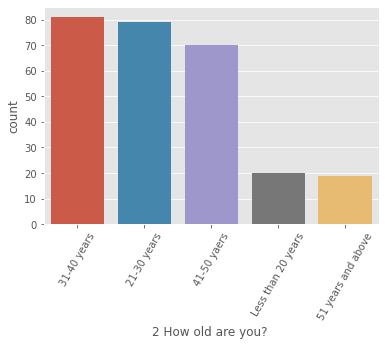

In [11]:
#lets have a look on age range
sns.countplot(data['2 How old are you? '])
print(data['2 How old are you? '].value_counts())
plt.xticks(rotation = 60)
plt.show()

Most customers are in the range of 21 to 50 years of age.

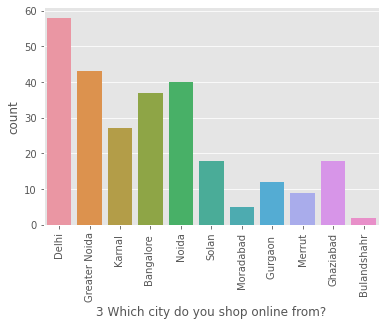

In [12]:
sns.countplot(data['3 Which city do you shop online from?'])
plt.xticks(rotation = 90)
plt.show()

* more number of customers are from Delhi, Greater Noida and Noida compared to other cities.

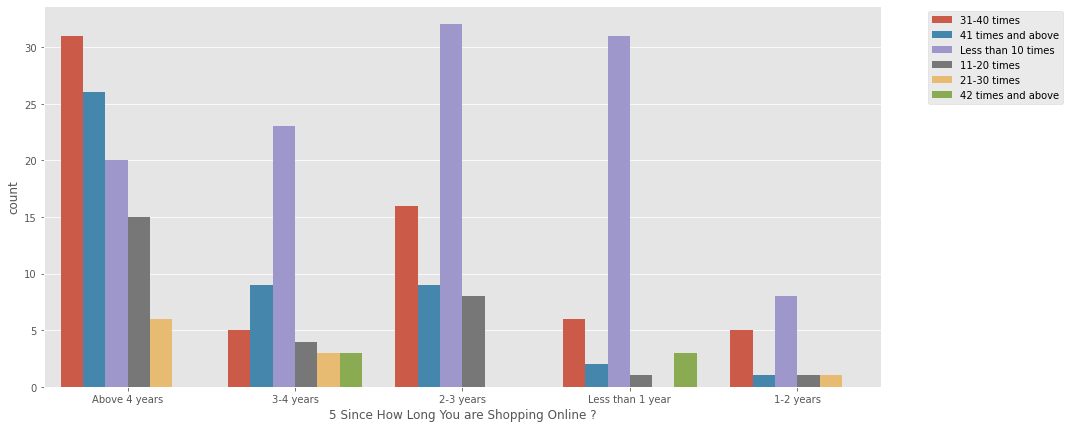

In [13]:
#Since How Long You are Shopping Online ?
plt.figure(figsize=(15,7))
sns.countplot(data['5 Since How Long You are Shopping Online ?'], hue = data['6 How many times you have made an online purchase in the past 1 year?'])
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

* This plot will tell us customers shopping since 2-3 years and above 4 years are shopping large number of times in a year compared to others. And customers who are shopping since 1-2 years are having very less tendency to purchase things online.

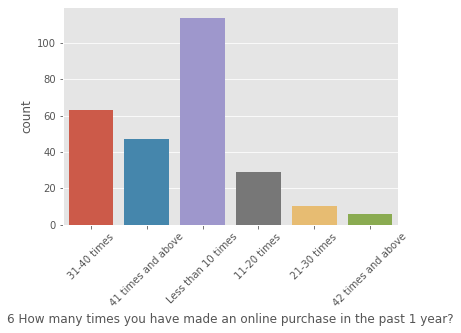

In [14]:
#How many times you have made an online purchase in the past 1 year?
sns.countplot(data['6 How many times you have made an online purchase in the past 1 year?'])
plt.xticks(rotation = 45)
plt.show()

* We can say there are more number of people who have purchased items less than 10 times.

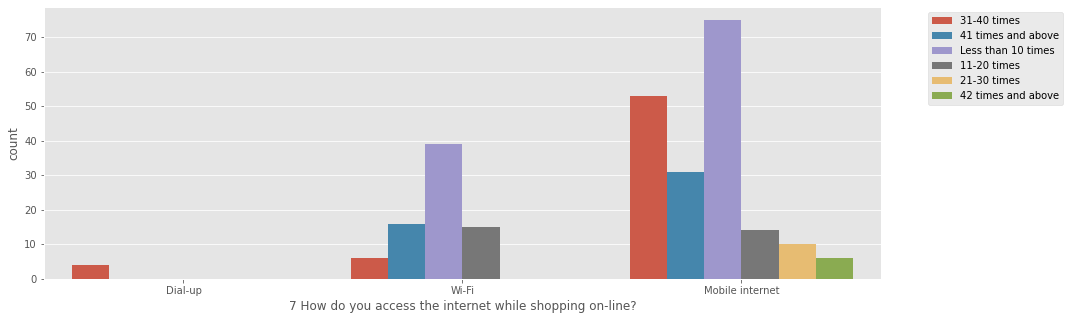

In [15]:
# How do you access the internet while shopping on-line?
plt.figure(figsize = (15,5))
sns.countplot(x = '7 How do you access the internet while shopping on-line?', hue = '6 How many times you have made an online purchase in the past 1 year?', data = data)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

* By looking at above plot we can say most of the people use mobile internet for shopping, and also they shops for more times compared to others.
* Very less number of customers uses Dial-up to access internet.

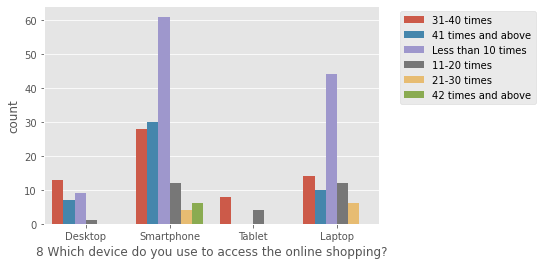

In [16]:
#Which device do you use to access the online shopping?
sns.countplot(x = '8 Which device do you use to access the online shopping?', hue = '6 How many times you have made an online purchase in the past 1 year?', data = data)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

* Most number of customers uses smartphones for shopping.

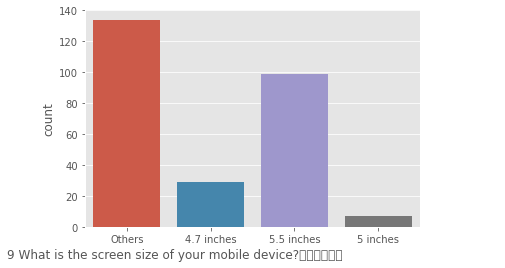

In [17]:
# What is the screen size of your mobile device?
sns.countplot(x = "9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ", data = data)
plt.show()

* The size of mobile device is mostly 5.5 inches and others.

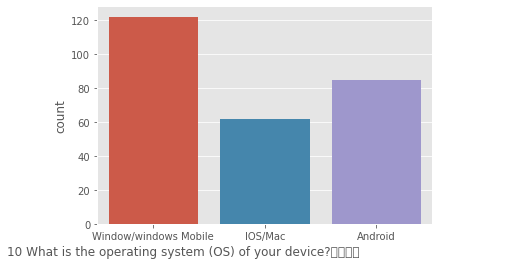

In [18]:
#What is the operating system (OS) of your device?
sns.countplot(x = "10 What is the operating system (OS) of your device?\t\t\t\t                                          ", data = data)
plt.show()

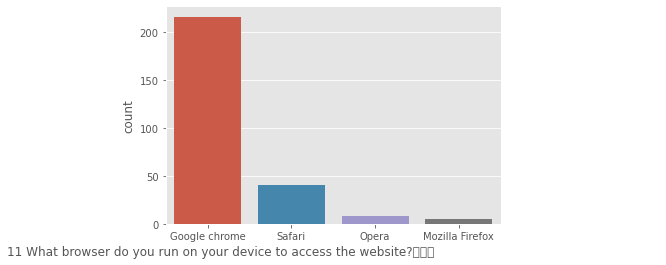

In [19]:
# What browser do you run on your device to access the website?
sns.countplot(x = "11 What browser do you run on your device to access the website?\t\t\t                                                          ", data = data)
plt.show()

* We can say higher number of customers uses google chrome browser.

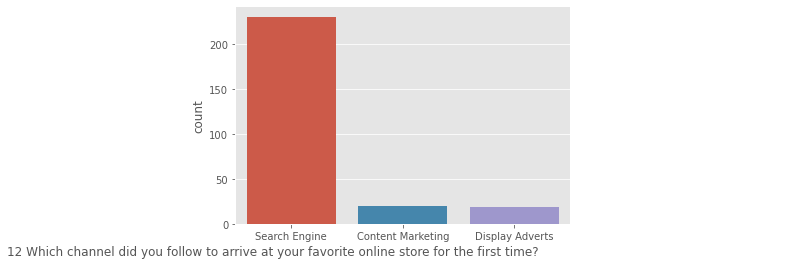

In [20]:
# Which channel did you follow to arrive at your favorite online store for the first time?
sns.countplot(x = "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ", data = data)
plt.show()

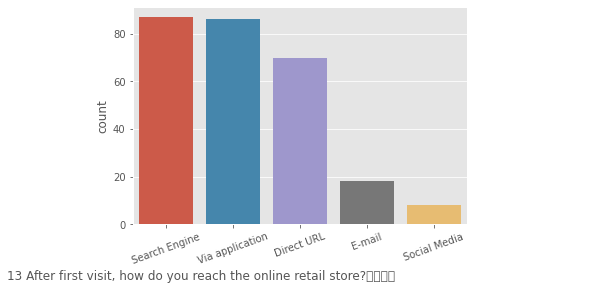

In [21]:
# After first visit, how do you reach the online retail store?
sns.countplot(x = "13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ", data = data)
plt.xticks(rotation = 20)
plt.show()

* After first visit, more number of customers uses search engine and applications to reach the online retail store.

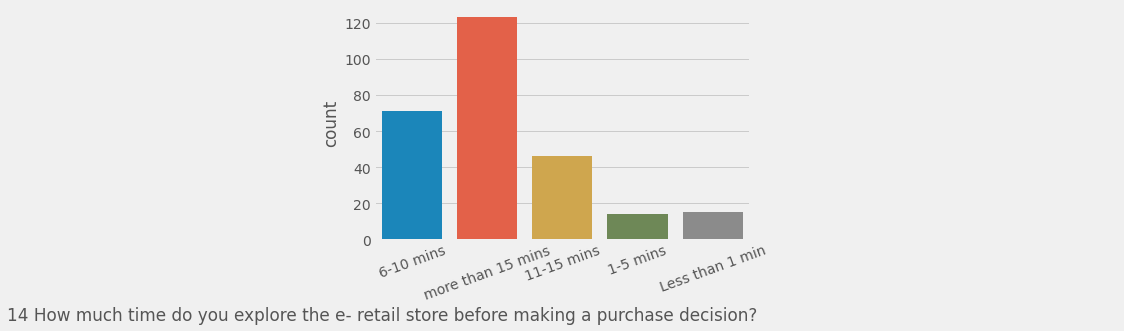

In [22]:
# How much time do you explore the e- retail store before making a purchase decision?
plt.style.use('fivethirtyeight')
sns.countplot(x = "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ", data = data)
plt.xticks(rotation = 20)
plt.show()

* We can say customer will take mostly more than 15 mins to make a decision to purchase an item.

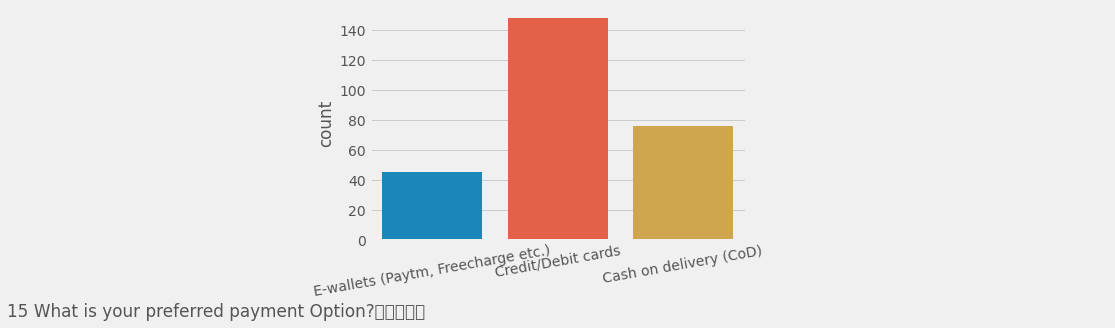

In [23]:
# What is your preferred payment Option
sns.countplot(x = "15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ", data = data)
plt.xticks(rotation = 10)
plt.show()

* customers prefers mostly Credit/Debit cards for payment and cash on delivery.

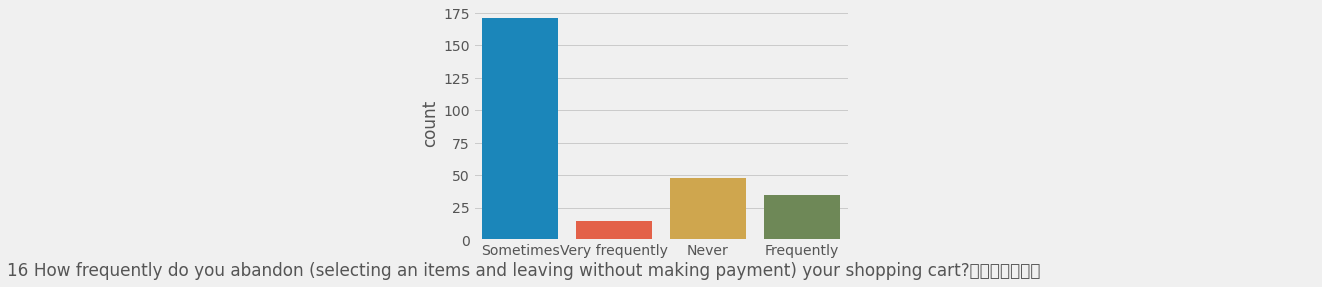

In [24]:
# How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?
sns.countplot(x = "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ", data = data)
plt.show()

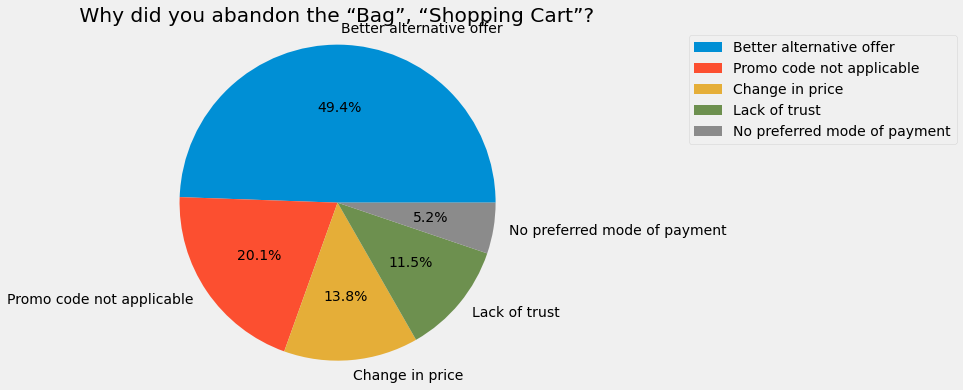

In [25]:
#Why did you abandon the “Bag”, “Shopping Cart”?
plt.figure(figsize=(10, 6))
plt.pie( data["17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       "].value_counts().values, labels = data["17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       "].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title(' Why did you abandon the “Bag”, “Shopping Cart”? ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

looking at the above plot we can say almost 50% of customers would abandon the shopping cart because of better alternative offers.

## Using columns 18 to 47; I have derived different points which can be used as suggestions by most of the customers.

In [26]:
# fetch Points on which most of the customers strongly agree:
for col in data.columns:
    if data[col].value_counts().index[0] == 'Strongly agree (5)':
        print(col)
    

18 The content on the website must be easy to read and understand
19 Information on similar product to the one highlighted  is important for product comparison
22 Ease of navigation in website
23 Loading and processing speed
24 User friendly Interface of the website
25 Convenient Payment methods
26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time
27 Empathy (readiness to assist with queries) towards the customers
28 Being able to guarantee the privacy of the customer
29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)
30 Online shopping gives monetary benefit and discounts
31 Enjoyment is derived from shopping online
32 Shopping online is convenient and flexible
33 Return and replacement policy of the e-tailer is important for purchase decision
34 Gaining access to loyalty programs is a benefit of shopping online
35 Displaying quality Information on the website improves satisfaction

In [27]:
# fetch Points on which most of the customers are agree:
for col in data.columns:
    if data[col].value_counts().index[0] == 'Agree (4)':
        print(col)

20 Complete information on listed seller and product being offered is important for purchase decision.
21 All relevant information on listed products must be stated clearly
42 The Convenience of patronizing the online retailer
43 Shopping on the website gives you the sense of adventure
46 Shopping on the website helps you fulfill certain roles
47 Getting value for money spent


In [28]:
# Points on which most of the customers are indifferent:
for col in data.columns:
    if data[col].value_counts().index[0] == 'indifferent (3)':
        print(col)

44 Shopping on your preferred e-tailer enhances your social status
45 You feel gratification shopping on your favorite e-tailer


## From column number 48 to 71; I observed that these columns contain data which is derived by taking reviews or feedback from every customers on different aspects.

Shopping platform
Amazon.in            249
Flipkart.com         201
Myntra.com           147
Snapdeal.com         130
Paytm.com            125
dtype: int64


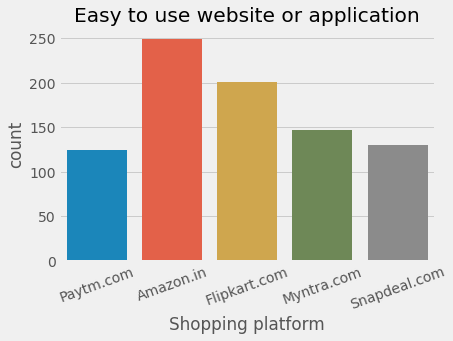

In [29]:
# lets check review of customers on bases of Easy to use website or application
a = list(data['Easy to use website or application'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Easy to use website or application')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            269
Flipkart.com         221
Snapdeal.com         182
Paytm.com            150
Myntra.com           146
dtype: int64


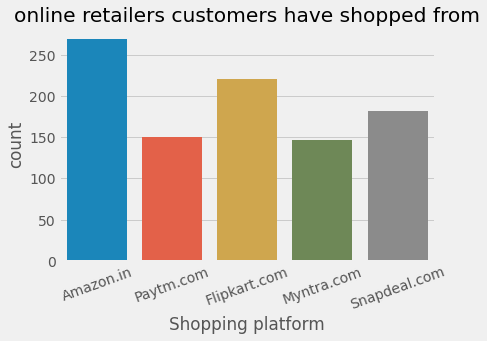

In [30]:
a = list(data['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           '])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('online retailers customers have shopped from')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            227
Flipkart.com         175
Myntra.com           115
Paytm.com             67
Snapdeal.com          61
dtype: int64


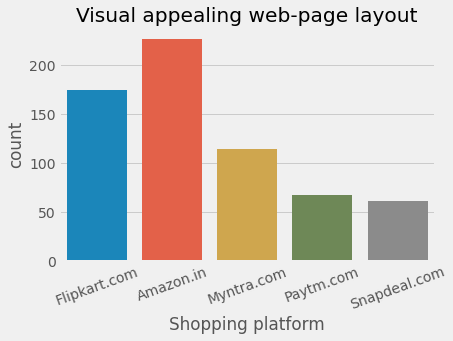

In [31]:
# Visual appealing web-page layout
a = list(data['Visual appealing web-page layout'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Visual appealing web-page layout')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            220
Flipkart.com         184
Myntra.com            64
Paytm.com             20
Snapdeal.com          14
dtype: int64


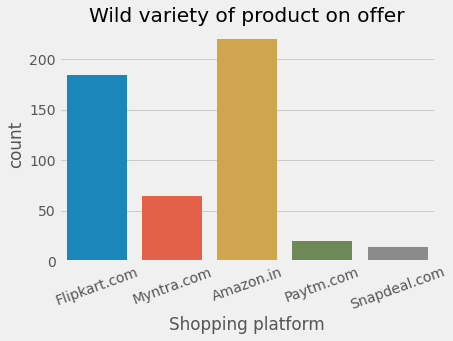

In [32]:
# Wild variety of product on offer
a = list(data['Wild variety of product on offer'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Wild variety of product on offer')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            238
Flipkart.com         194
Myntra.com            64
Paytm.com             59
Snapdeal.com          59
dtype: int64


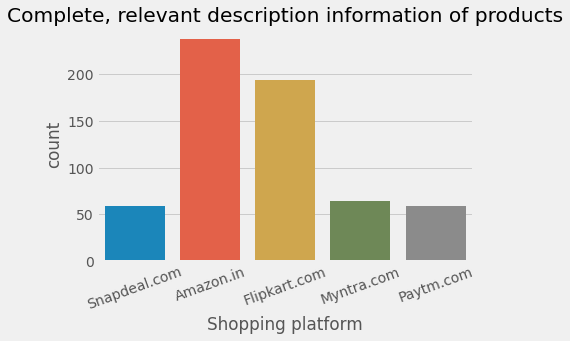

In [33]:
# Complete, relevant description information of products
a = list(data['Complete, relevant description information of products'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Complete, relevant description information of products')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            249
Flipkart.com         162
Paytm.com             99
Snapdeal.com          81
Myntra.com            74
dtype: int64


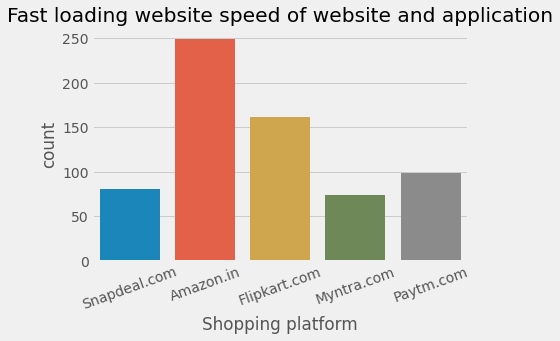

In [34]:
# Fast loading website speed of website and application
a = list(data['Fast loading website speed of website and application'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Fast loading website speed of website and application')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            227
Flipkart.com         146
Paytm.com             96
Myntra.com            64
Snapdeal.com          45
dtype: int64


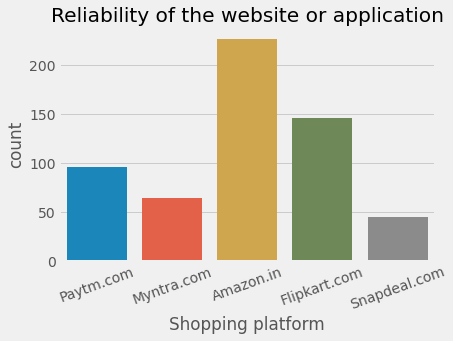

In [35]:
# Reliability of the website or application
a = list(data['Reliability of the website or application'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Reliability of the website or application')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.com           215
Flipkart.com         158
Paytm.com            107
Myntra.com            79
Snapdeal              29
dtype: int64


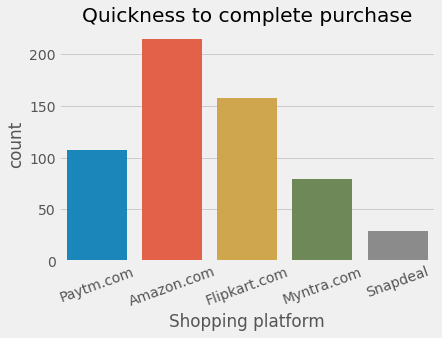

In [36]:
# Quickness to complete purchase
a = list(data['Quickness to complete purchase'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Quickness to complete purchase')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            215
Flipkart.com         203
Myntra.com           132
Snapdeal.com          90
Patym.com             82
dtype: int64


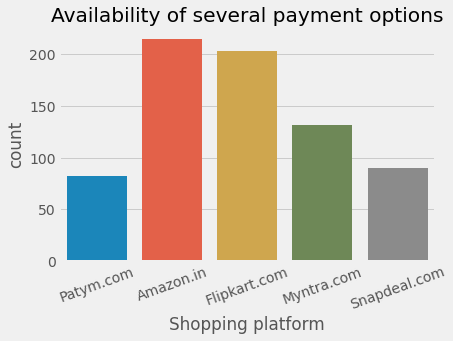

In [37]:
# Availability of several payment options
a = list(data['Availability of several payment options'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Availability of several payment options')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            240
Flipkart.com         162
Snapdeal.com          50
Myntra.com            29
dtype: int64


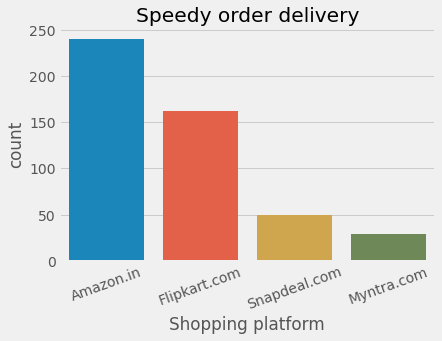

In [38]:
# Speedy order delivery
a = list(data['Speedy order delivery '])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Speedy order delivery')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            221
Flipkart.com         150
Myntra.com            78
Paytm.com             68
Snapdeal.com          45
dtype: int64


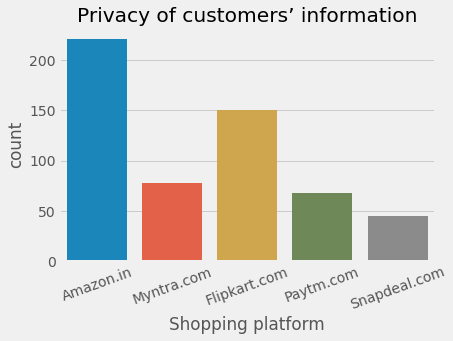

In [39]:
# Privacy of customers’ information
a = list(data['Privacy of customers’ information'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Privacy of customers’ information')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            206
Flipkart.com         149
Snapdeal.com         100
Myntra.com            91
Paytm.com             88
dtype: int64


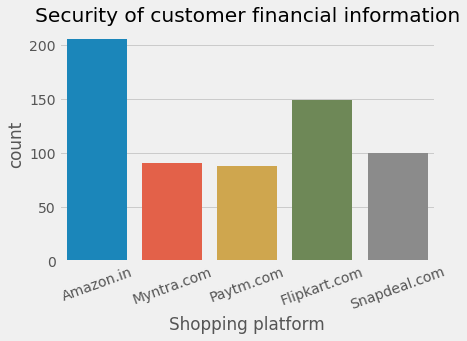

In [40]:
# Security of customer financial information
a = list(data['Security of customer financial information'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Security of customer financial information')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            227
Flipkart.com         143
Myntra.com            88
Snapdeal.com          74
Paytm.com             24
dtype: int64


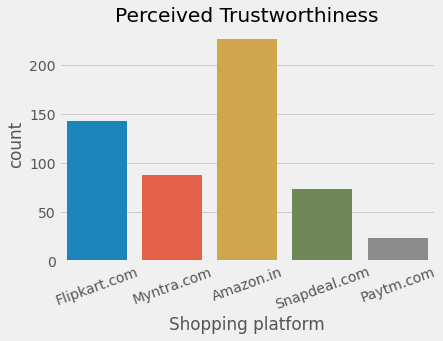

In [41]:
# Perceived Trustworthiness
a = list(data['Perceived Trustworthiness'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Perceived Trustworthiness')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            229
Flipkart.com         136
Myntra.com           111
Snapdeal              87
Paytm.com             25
dtype: int64


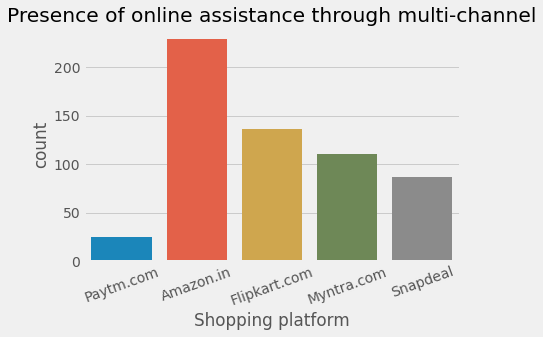

In [42]:
# Presence of online assistance through multi-channel
a = list(data['Presence of online assistance through multi-channel'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Presence of online assistance through multi-channel')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            135
Flipkart.com         103
Paytm.com             77
Snapdeal.com          67
Myntra.com            35
dtype: int64


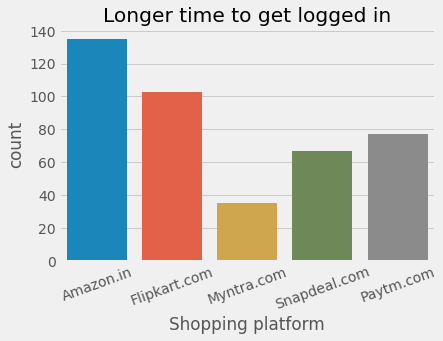

In [43]:
# Longer time to get logged in (promotion, sales period)
a = list(data['Longer time to get logged in (promotion, sales period)'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Longer time to get logged in')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            126
Flipkart.com          94
Snapdeal.com          92
Myntra.com            74
Paytm.com             28
dtype: int64


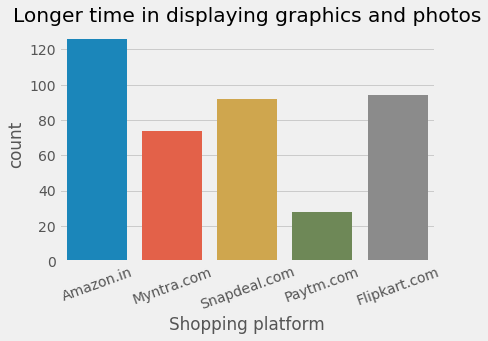

In [44]:
# Longer time in displaying graphics and photos (promotion, sales period)
a = list(data['Longer time in displaying graphics and photos (promotion, sales period)'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Longer time in displaying graphics and photos')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Myntra.com           75
Paytm.com            72
Amazon.in            56
snapdeal.com         48
Flipkart.com         43
dtype: int64


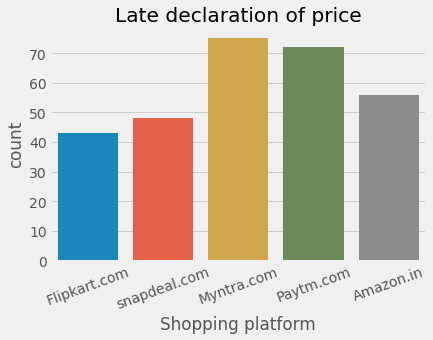

In [45]:
# Late declaration of price (promotion, sales period)
a = list(data['Late declaration of price (promotion, sales period)'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Late declaration of price')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Paytm.com            94
Amazon.in            68
Myntra.com           68
Snapdeal.com         63
Flipkart.com         61
dtype: int64


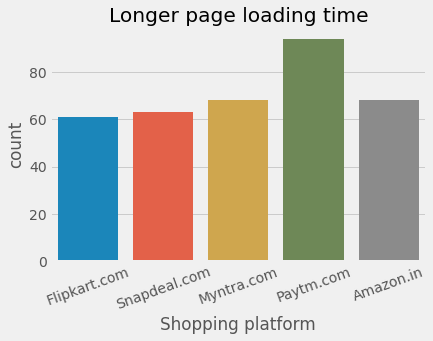

In [46]:
# Longer page loading time (promotion, sales period)
a = list(data['Longer page loading time (promotion, sales period)'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Longer page loading time')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Snapdeal.com         109
Amazon.in            104
Flipkart.com          60
Paytm.com             53
Myntra.com             7
dtype: int64


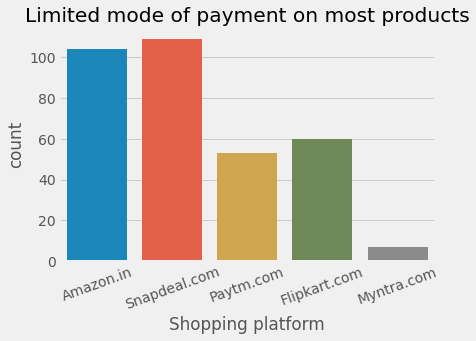

In [47]:
# Limited mode of payment on most products (promotion, sales period)
a = list(data['Limited mode of payment on most products (promotion, sales period)'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Limited mode of payment on most products')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Paytm.com            98
Snapdeal.com         90
Flipkart.com         44
Amazon.in            37
Myntra.com           26
dtype: int64


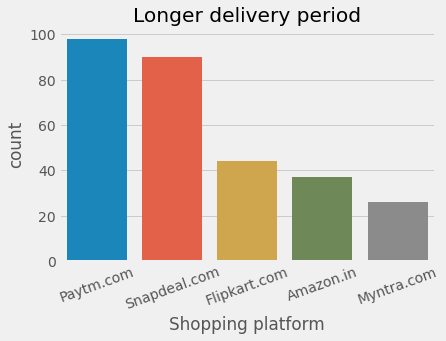

In [48]:
# Longer delivery period
a = list(data['Longer delivery period'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Longer delivery period')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            141
Flipkart.com          72
Paytm.com             63
Myntra.com            37
Snapdeal.com           8
dtype: int64


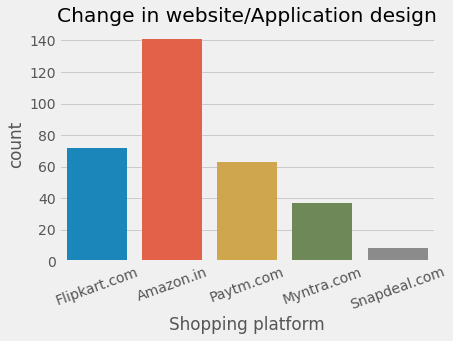

In [49]:
# Change in website/Application design
a = list(data['Change in website/Application design'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Change in website/Application design')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            78
Snapdeal.com         74
Myntra.com           66
Flipkart.com         62
Paytm.com            39
dtype: int64


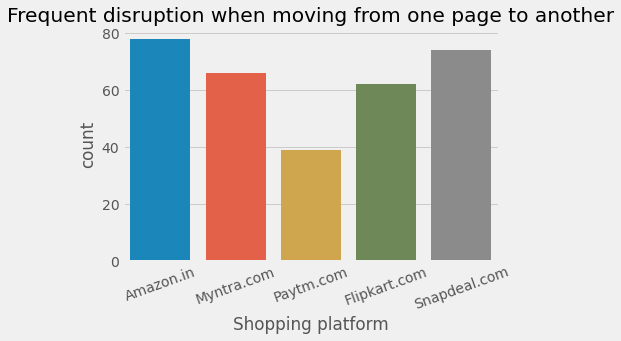

In [50]:
# Frequent disruption when moving from one page to another
a = list(data['Frequent disruption when moving from one page to another'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Frequent disruption when moving from one page to another')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            182
Flipkart.com         117
Paytm.com             58
Snapdeal.com          25
Myntra.com            14
dtype: int64


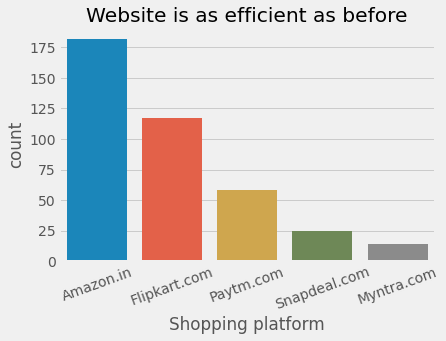

In [51]:
# Website is as efficient as before
a = list(data['Website is as efficient as before'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Website is as efficient as before')
plt.xticks(rotation = 20)
plt.show()

Shopping platform
Amazon.in            219
Flipkart.com         127
Myntra.com            76
Paytm.com             44
snapdeal.com          11
dtype: int64


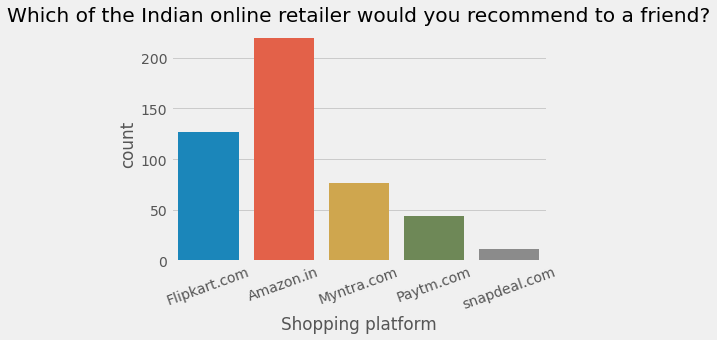

In [52]:
# Which of the Indian online retailer would you recommend to a friend?
a = list(data['Which of the Indian online retailer would you recommend to a friend?'])

lst = []
for i in a:
    for j in i.split(','):
        lst.append(j.strip())
df = pd.DataFrame(lst, columns = ["Shopping platform"])
print(df.value_counts())
sns.countplot(df['Shopping platform'])
plt.title('Which of the Indian online retailer would you recommend to a friend?')
plt.xticks(rotation = 20)
plt.show()